# План рекламных кампаний для магазина компьютерных игр

## Описание проекта

Интернет-магазин продаёт компьютерные игры по всему миру. Нам доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. 

## Описание данных

- *Name* — название игры
- *Platform* — платформа
- *Year_of_Release* — год выпуска
- *Genre* — жанр игры
- *NA_sales* — продажи в Северной Америке (миллионы долларов)
- *EU_sales* — продажи в Европе (миллионы долларов)
- *JP_sales* — продажи в Японии (миллионы долларов)
- *Other_sales* — продажи в других странах (миллионы долларов)
- *Critic_Score* — оценка критиков (максимум 100)
- *User_Score* — оценка пользователей (максимум 10)
- *Rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию, а именно:

  1. **EC («Early childhood»)** — «Для детей младшего возраста»
  2. **E («Everyone»)** — «Для всех»
  3. **K-A ("Kids to Adults")** — вариация категории «Для всех»
  4. **E10+ («Everyone 10 and older»)** — «Для всех от 10 лет и старше»
  5. **T («Teen»)** — «Подросткам»
  6. **M («Mature»)** — «Для взрослых 17+»
  7. **AO («Adults Only 18+»)** — «Только для взрослых»
  8. **RP («Rating Pending»)** — «Рейтинг ожидается»
  
**NB.** Данные за 2016 год могут быть неполными.

## Оглавление проекта:
1. Откроем файл с данными и изучим общую информацию
2. Подготовим данные
3. Проведем исследовательский анализ данных
4. Составим портрет пользователя каждого региона
5. Проверим гипотезы
6. Общий вывод

### Шаг 1. Откроем файл с данными и изучим общую информацию

In [1]:
#импортируем необходимые библиотеки и пакеты
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
from scipy import stats as st

In [4]:
import seaborn as sns

In [5]:
#прочитаем данные и ознакомимся с ними
game_stat = pd.read_csv('/datasets/games.csv')
game_stat.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [6]:
game_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
game_stat['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

**Вывод:** Импортировали необходимые для работы библиотеки и пакеты, прочитали данные и ознакомились с ними, выявили ошибки и неточности, которые будем обрабатывать в следующем шаге:

 - в столбцах `Name`, `Year_of_Release`, `Critic_Score`, `User_Score` и `Rating` имеются пропуски;
 - названия столбцов содержат в себе буквы разного регистра;
 - значения в столбце `Year_of_Release` указаны в неверном формате - **float64**;
 - значения в столбце `User_Score` указаны в неверном формате - **object**;
 - в столбце `Rating` находятся категории ***E*** и ***K-A***, которые являются вариациями одной категории.

### Шаг 2. Подготовим данные

In [8]:
#приведем названия столбцов к нижнему регистру
game_stat.columns = map(str.lower, game_stat.columns)

In [9]:
#рейтинг K-A заменим на E
game_stat['rating'] = game_stat['rating'].replace('K-A', 'E')

В столбцах `year_of_release` и `user_score` заменим тип данных, предварительно заменив пропущенные значение на нетипичное **-1**. Год выпуска - это целое число, поэтому эти значения будут указаны в формате **int64**, а оценка пользователей - невещественное число, приведем эти значения к формату **float64**.

In [10]:
game_stat['year_of_release'] = game_stat['year_of_release'].fillna(-1).astype(int)

In [11]:
game_stat['user_score'] = game_stat['user_score'].fillna(-1)

В столбце `user_score` имеются значения ***tbd*** (*to be determined*) с английского можно перевести как **будет определен позднее**, то есть, для этих наблюдений оценка пользователей еще не определена. Заменим эти значения на -1, чтобы изменить тип данных столбца, и будем учитывать эти значения при дальнейших рассчетах.

In [12]:
#наблюдения со значением tbd в столбце user_score заменим на 0. Так эти значения не помешают при дальнейших рассчетах
game_stat['user_score'] = game_stat['user_score'].replace('tbd', -1)
game_stat['user_score'] = pd.to_numeric(game_stat['user_score'])

Обработаем пропуски в столбцах.

In [13]:
game_stat.query('name.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,-1.0,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,-1.0,NaN


В столбце `name` имеется два пропуска. Оба наблюдения от 1993 года, к тому же имеют много пропусков в других столбцах (например, в столбце `genre`, что тоже помешает нам работать с данными). Избавимся от них, на результат дальнейшего исследования они не повлияют.

In [14]:
game_stat.dropna(subset = ['name'], inplace = True)

В столбце `year_of_release` не будем обрабатывать неизвестные нам значения или избавляться от строк с пропусками в этом столбце. Оставим их заполненными нехарактерным значением **-1** и будем учитывать это в ходе работы.

Пропуски в столбцах `critic_score` и `user_score` (также как и в `year_of_release` и `rating`) могли появиться по разным причинам. Можно заметить, что у старых наблюдений отсутствует рейтинг и оценка критиков/пользователей. Напрашивается мысль, что раньше эти данные просто не собирали. Но пропуски есть и у относительно новых наблюдений. Здесь могли сыграть роль баги системы, ошибки при выгрузке данных, человеческий фактор и другие. 

В `user_score` мы уже заполнили пропуски нетипичным значением -1. Сделаем то же самое с пропусками в `critic_score` и `rating`, а затем будем учитывать это в дальнейшей работе. Это поможет нам сохранить данные и не повлиять на результаты исследования.

In [15]:
game_stat['critic_score'] = game_stat['critic_score'].fillna(-1)

In [16]:
game_stat['rating'] = game_stat['rating'].fillna(-1)

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [17]:
game_stat['total_sales'] = game_stat['na_sales'] + game_stat['eu_sales'] + game_stat['jp_sales'] + game_stat['other_sales']

In [18]:
game_stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null float64
rating             16713 non-null object
total_sales        16713 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.7+ MB


**Вывод:** 
1. привели названия столбцов к нижнему регистру;
2. преобразовали данные в `year_of_release` в формат int64, а в `user_score` в float64 в нужные типы;
3. обработали пропуски - в столбцах `сritic_score`, `user_score` и `rating` пропущена почти половина значений. Заполнение этих пропусков синтетическими данными привело бы к искажению результатов исследования, поэтому заменили их на -1 и будем учитывать это в дальнейшем исследовании;
4. от пропусков в `name` избавились;
5. в `user_score`  изменили значения **tbd** на -1;
6. посчитали суммарные продажи во всех регионах и записали их в отдельный столбец `total_sales`

### Шаг 3. Проведем исследовательский анализ данных

- Посмотрим, сколько игр выпускалось в разные годы.

Для проведения исследования нам необязательно знать статистику за последние 30 лет. Нам необходимы только актуальные данные. Обратим внимание на изменение продаж у платформ, начиная с 2000 года и определим промежуток времени, который будем исследовать в дальнейшем.

Text(0.5, 0, 'Год выпуска')

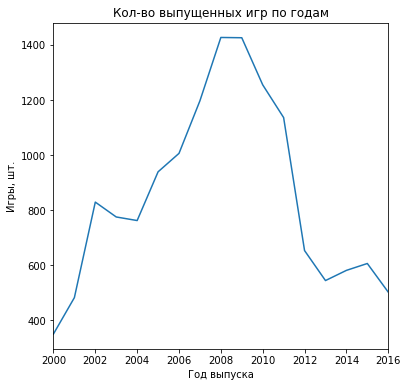

In [57]:
count_by_year = game_stat.query('year_of_release >= 2000').groupby('year_of_release')['name'].count()
count_by_year.plot(figsize=(6, 6), title='Кол-во выпущенных игр по годам')
ax = plt.gca()
ax.set_ylabel('Игры, шт.')
ax.set_xlabel('Год выпуска')

Видим, что основная масса новых игр приходится на 2006-2012 годы, после этого периода количество выпускающихся игр идет на спад.

- Посмотрим, как менялись продажи по платформам и ответим на вопрос:

 **За какой характерный срок появляются новые и исчезают старые платформы?**

In [20]:
game_stat.query('year_of_release > 2000').pivot_table(index='platform', columns='year_of_release', values='name', aggfunc='count', fill_value='-')

year_of_release,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,
3DS,-,-,-,-,-,-,-,-,-,-,116,93,91,80,86,46
DC,8,1,-,-,-,-,1,1,-,-,-,-,-,-,-,-
DS,-,-,-,23,118,201,376,492,403,323,153,23,8,-,-,-
GB,10,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
GBA,107,198,150,175,135,39,6,-,-,-,-,-,-,-,-,-
GC,22,152,144,83,97,40,4,-,-,-,-,-,-,-,-,-
N64,9,1,-,-,-,-,-,-,-,-,-,-,-,-,-,-
PC,15,19,33,30,37,52,62,76,107,90,139,61,38,47,50,54
PS,91,20,3,-,-,-,-,-,-,-,-,-,-,-,-,-


По распределению можно заметить, что примерно в 2006 году рынок платформ меняется и на замену старым приходят новые.

Для дальнейшего исследования нам будет вполне достаточно последних 10 лет. Оставим данные с 2006 года по 2016 включительно.

In [21]:
game_stat_new = game_stat.query('year_of_release >= 2006')

In [22]:
#найдем платформы с наибольшими суммарными продажами
platform_sales = game_stat_new.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index().head(10)
platform_sales.head(10)

,platform,total_sales
0,X360,952.99
1,PS3,931.34
2,Wii,891.18
3,DS,655.35
4,PS4,314.14
5,PS2,265.80
6,3DS,257.81
7,PSP,238.63
8,PC,163.42
9,XOne,159.32


In [23]:
top_platforms = platform_sales['platform'].to_list()
top_platforms

['X360', 'PS3', 'Wii', 'DS', 'PS4', 'PS2', '3DS', 'PSP', 'PC', 'XOne']

In [24]:
game_stat_new_top = game_stat_new.query('platform in @top_platforms')
game_stat_new_top.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


In [25]:
#еще раз взглянем на сводную таблицу уже по новым данным
game_stat_new_top.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum', fill_value='-')

year_of_release,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,
3DS,-,-,-,-,-,63.2,51.36,56.57,43.76,27.78,15.14
DS,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54,-,-,-
PC,2.85,9.28,12.42,16.91,24.28,35.03,23.22,12.38,13.28,8.52,5.25
PS2,103.42,75.99,53.9,26.4,5.64,0.45,-,-,-,-,-
PS3,20.96,73.19,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.6
PS4,-,-,-,-,-,-,-,25.99,100,118.9,69.25
PSP,55.32,46.93,34.55,37.78,35.04,17.82,7.69,3.14,0.24,0.12,-
Wii,137.15,152.77,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18
X360,51.62,95.41,135.26,120.29,170.03,143.84,99.74,88.58,34.74,11.96,1.52


Посмотрев на данные по продажам платформ, можем отметить, что пик прибыли у большинства приходится на 2008-2011 годы. Позднее выручка становится все меньше и меньше. Назвать потенциально прибыльной (учитывая, что в нашем распоряжении данные не за полный 2016 год) можно только платформу PS4.

 - Построим «ящики с усами» по глобальным продажам каждой игры и c разбивкой по платформам.

Text(0.5, 0, 'Выручка, млн дол.')

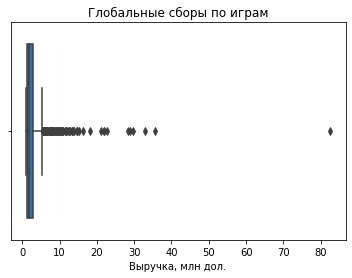

In [26]:
#берем только те игры, общие продажи которых больше 1 млн долларов
g = game_stat_new.query('total_sales > 1')
ax = sns.boxplot('total_sales', data= g)
ax.set_title('Глобальные сборы по играм')
ax.set_xlabel('Выручка, млн дол.')

Разница в продажах игр очень велика. Нормальные значения продаж не превышают 7-8 миллионов долларов, но при этом на графике очень много выбросов (больших значений), и есть даже такие игры, продажи которых принесли аж 80 млн долларов.

Text(0.5, 0, 'Выручка, млн дол.')

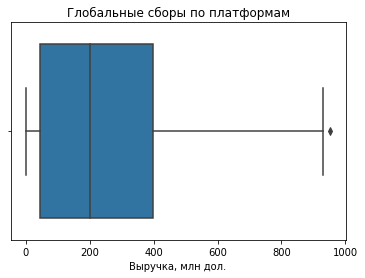

In [27]:
p = game_stat_new.groupby('platform')['total_sales'].sum().reset_index()
ax = sns.boxplot('total_sales', data=p)
ax.set_title('Глобальные сборы по платформам')
ax.set_xlabel('Выручка, млн дол.')

Основная часть значений находится в промежутке 50 - 400, также видим хвост из больших значений, которые однако не влияют на медиану.

Text(0, 0.5, '')

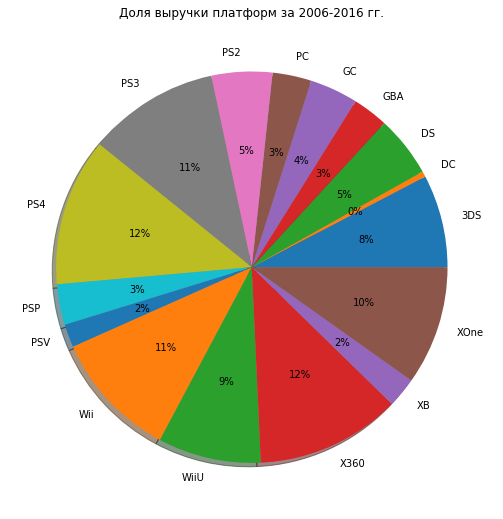

In [66]:
#посмотрим на среднюю выручку платформ по годам за выбранный период
revenue_mean = game_stat_new.groupby('platform')['total_sales'].mean()
revenue_mean.plot(kind='pie', figsize=(9, 9), autopct='%1.0f%%', shadow=True, title='Доля выручки платформ за 2006-2016 гг.')
ax = plt.gca()
ax.set_ylabel('')

За выбранный период есть несколько лидеров по средним продажам - **PS4** (эту платформу мы уже отметили ранее), **X360**, **PS3**, **Wii** и **XOne**.

- Посмотрим, как влияют на продажи внутри одной популярной платформы (**PS4**) отзывы пользователей и критиков. Построим диаграммы рассеяния и посчитаем корреляцию между отзывами и продажами.

In [29]:
#выделим в отдельную таблицу продажи по PS4
game_stat_ps4 = game_stat_new.query('platform == "PS4" and user_score != -1 and critic_score != -1')

Text(0.5, 0, 'Оценка пользователей')

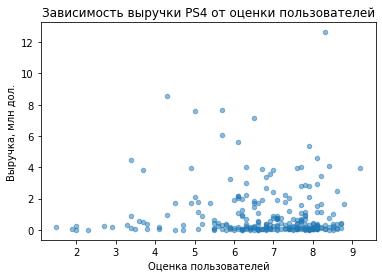

In [30]:
game_stat_ps4.plot(y='total_sales', x='user_score', kind='scatter', alpha=0.5, title='Зависимость выручки PS4 от оценки пользователей')
ax = plt.gca()
ax.set_ylabel('Выручка, млн дол.')
ax.set_xlabel('Оценка пользователей')

In [31]:
game_stat_ps4['total_sales'].corr(game_stat_ps4['user_score'])

-0.03362497596528878

Text(0.5, 0, 'Оценка критиков')

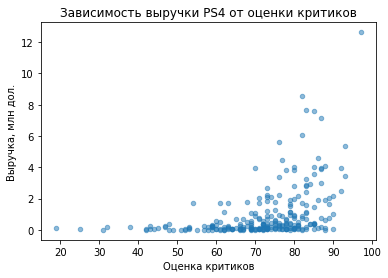

In [32]:
game_stat_ps4.plot(y='total_sales', x='critic_score', kind='scatter', alpha=0.5, title='Зависимость выручки PS4 от оценки критиков')
ax = plt.gca()
ax.set_ylabel('Выручка, млн дол.')
ax.set_xlabel('Оценка критиков')

In [33]:
game_stat_ps4['total_sales'].corr(game_stat_ps4['critic_score'])

0.40589480145836687

И по графикам, и по значению корреляции видим, что отзывы критиков в большей степени влияют на продажи, чем отзывы пользователей.
Больше всего выручка при оценке критиков 70 и выше.

Посмотрим, как графики и корреляция будут выглядеть для всех десяти платформ.

Text(0.5, 0, 'Оценка пользователей')

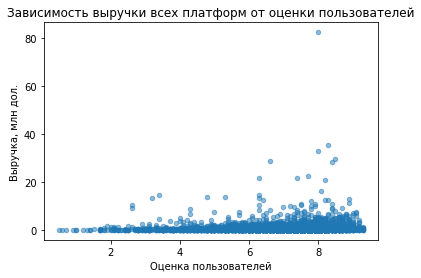

In [34]:
game_stat_new_filtered = game_stat_new.query('user_score != -1 and critic_score != -1')
game_stat_new_filtered.plot(y='total_sales', x='user_score', kind='scatter', alpha=0.5, title='Зависимость выручки всех платформ от оценки пользователей')
ax = plt.gca()
ax.set_ylabel('Выручка, млн дол.')
ax.set_xlabel('Оценка пользователей')

In [35]:
game_stat_new_filtered['total_sales'].corr(game_stat_new_filtered['user_score'])

0.08243132144595271

Text(0.5, 0, 'Оценка критиков')

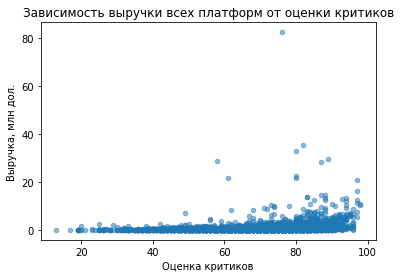

In [36]:
game_stat_new_filtered.plot(y='total_sales', x='critic_score', kind='scatter', alpha=0.5, title='Зависимость выручки всех платформ от оценки критиков')
ax = plt.gca()
ax.set_ylabel('Выручка, млн дол.')
ax.set_xlabel('Оценка критиков')

In [37]:
game_stat_new_filtered['total_sales'].corr(game_stat_new_filtered['critic_score'])

0.22925047605657242

При взгляде на два последних графика можно заметить, что разница в корреляции **оценка критика/выручка** и **оценка пользователя/выручка** совсем небольшая. Для платформы **PS4** она заметнее, а корреляция **оценка критика/выручка** сильнее.

- Посмотрим на общее распределение игр по жанрам.

In [38]:
game_stat_new.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Action,1116.65
Sports,793.85
Shooter,717.04
Misc,554.86
Role-Playing,522.40
Racing,299.00
Platform,279.74
Simulation,220.65
Fighting,188.42


С большим отрывом по продажам лидируют игры жанра `Action`, за ними идут жанры `Sports` и `Shooter`.
Самые низкие сборы у жанров `Adventure`, `Puzzle` и `Strategy`.

**Вывод:** 

Провели исследовательский анализ данных, выделили срез данных за 2006-2016 гг, нашли 10 платформ-лидеров по продажам. 

- В промежутке исследуемых 10-лет пик прибыли у большинства платформ приходится на 2008-2011 годы. Позднее выручка становится все меньше и меньше. Назвать потенциально прибыльной (учитывая, что в нашем распоряжении данные не за полный 2016 год) можно только платформу PS4.

- На примере PS4 рассмотрели корреляцию **оценка критика/выручка** и **оценка пользователя/выручка** и пришли к выводу, что отзывы критиков в большей степени влияют на продажи, чем отзывы пользователей.

- Больше всего выручка у платформы при оценке критиков 70 и выше.

- Самыми прибыльными оказались жанры `Action`, `Sports` и `Shooter`.

- Самые низкие сборы у жанров `Adventure`, `Puzzle` и `Strategy`.

### Шаг 4. Составим портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
- самые популярные платформы (топ-5)
- самые популярные жанры (топ-5)
- влияние рейтинга ESRB на продажи в регионе

#### Северная Америка

In [39]:
(game_stat_new
 .groupby('platform')['na_sales']
 .sum()
 .reset_index()
 .sort_values(by='na_sales', ascending=False)
 .head(5)
)

,platform,na_sales
13,X360,588.84
11,Wii,486.87
7,PS3,390.13
2,DS,323.99
6,PS2,114.89


In [40]:
(game_stat_new
 .groupby('genre')['na_sales']
 .sum()
 .reset_index()
 .sort_values(by='na_sales', ascending=False)
 .head(5)
)

,genre,na_sales
0,Action,530.44
10,Sports,396.64
8,Shooter,373.13
3,Misc,285.06
7,Role-Playing,199.63


In [41]:
(game_stat_new
 .query('rating != -1')
 .groupby('rating')['na_sales']
 .sum()
 .reset_index()
 .sort_values(by='na_sales', ascending=False)
 .head(5)
)

,rating,na_sales
0,E,796.98
3,M,574.33
5,T,424.14
1,E10+,315.40
2,EC,1.32


- в Северной Америке лидируют платформы `X360`, `Wii` и `PS3`, разница в продажах не очень велика
- самые популярные жанры - `Action`, `Sports`,`Shooter`, `Misc` и `Role-Playing`
- с большим отрывом по продажам лидирует рейтинг `E`, затем идут `M` и `T`

#### Европа

In [42]:
(game_stat_new
 .groupby('platform')['eu_sales']
 .sum()
 .reset_index()
 .sort_values(by='eu_sales', ascending=False)
 .head(5)
)

,platform,eu_sales
7,PS3,327.21
13,X360,267.89
11,Wii,258.32
2,DS,142.99
8,PS4,141.09


In [43]:
(game_stat_new
 .groupby('genre')['eu_sales']
 .sum()
 .reset_index()
 .sort_values(by='eu_sales', ascending=False)
 .head(5)
)

,genre,eu_sales
0,Action,350.70
10,Sports,251.55
8,Shooter,238.89
3,Misc,146.88
6,Racing,113.39


In [44]:
(game_stat_new
 .query('rating != -1')
 .groupby('rating')['eu_sales']
 .sum()
 .reset_index()
 .sort_values(by='eu_sales', ascending=False)
 .head(5)
)

,rating,eu_sales
0,E,461.09
3,M,398.90
5,T,235.44
1,E10+,173.35
4,RP,0.03


- в Европе лидируют все те же приставки, но распределение немного другое, здесь в топе `PS3`, затем `X360` и `Wii`
- самые популярные жанры все те же - `Action`, `Sports`,`Shooter`, `Misc`. Жанра `Role-Playing`, который был в топе по СА, здесь нет, зато есть `Racing`.
- также лидируют рейтинги `E` и `M`

#### Япония

In [45]:
(game_stat_new
 .groupby('platform')['jp_sales']
 .sum()
 .reset_index()
 .sort_values(by='jp_sales', ascending=False)
 .head(5)
)

,platform,jp_sales
2,DS,141.49
0,3DS,100.62
7,PS3,79.41
9,PSP,70.63
11,Wii,68.28


In [46]:
(game_stat_new
 .groupby('genre')['jp_sales']
 .sum()
 .reset_index()
 .sort_values(by='jp_sales', ascending=False)
 .head(5)
)

,genre,jp_sales
7,Role-Playing,170.38
0,Action,102.07
3,Misc,64.53
10,Sports,48.97
4,Platform,35.20


In [47]:
(game_stat_new
 .query('rating != -1')
 .groupby('rating')['jp_sales']
 .sum()
 .reset_index()
 .sort_values(by='jp_sales', ascending=False)
 .head(5)
)

,rating,jp_sales
0,E,120.36
5,T,83.90
3,M,43.79
1,E10+,36.57
2,EC,0.00


*В Японии немного по-другому*:
- лидируют совсем другие платформы - `3DS`, `WiiU`, `DS`, `PSP`, `PS3`
- самые популярные жанры - `Role-Playing`, `Platform`, `Sports`, `Misc`, `Action`. В Японии популярные жанры выглядят более безобидно
- самые большие продажи у рейтингов `E` (для всех) и `T` (для подростков). Похоже, в Японии выбирают более спокойные игры.

#### Другие страны

In [50]:
(game_stat_new
 .groupby('platform')['other_sales']
 .sum()
 .reset_index()
 .sort_values(by='other_sales', ascending=False)
 .head(5)
)

,platform,other_sales
7,PS3,134.59
13,X360,84.24
11,Wii,77.71
6,PS2,68.70
8,PS4,48.35


In [52]:
(game_stat_new
 .groupby('genre')['other_sales']
 .sum()
 .reset_index()
 .sort_values(by='other_sales', ascending=False)
 .head(5)
)

,genre,other_sales
0,Action,133.44
10,Sports,96.69
8,Shooter,85.67
3,Misc,58.39
7,Role-Playing,41.77


In [48]:
(game_stat_new
 .query('rating != -1')
 .groupby('rating')['other_sales']
 .sum()
 .reset_index()
 .sort_values(by='other_sales', ascending=False)
 .head(5)
)

,rating,other_sales
0,E,162.54
3,M,140.70
5,T,105.85
1,E10+,67.51
2,EC,0.08


**Вывод:**

*В Северной Америке и Европе картина примерно одинакова*:
- лидируют платформы `X360`, `Wii` и `DS`, `PS3` с небольшой разницей в распределении продаж.
- самые популярные жанры - `Action`, `Sports`,`Shooter`, `Misc`
- с большим отрывом по продажам лидирует рейтинг `E` (для всех), на втором месте `M` (18+)

*В Японии немного по-другому*:
- лидируют совсем другие платформы - `3DS`, `WiiU`, `DS`, `PSP`, `PS3`
- самые популярные жанры - `Role-Playing`, `Platform`, `Sports`, `Misc`, `Action`. В Японии популярные жанры выглядят более безобидно
- самые большие продажи у рейтингов `E` (для всех) и `T` (для подростков). Похоже, в Японии выбирают более спокойные игры.

*Другие страны*:
- для остальных стран портрет потребителя примерно одинаков с потребителями из СА и Европы. Лидируют те же платформы, жанры и рейтинги. Выходит, Япония - достаточно специфический рынок, к которому нужен особый подход в плане рекламных кампаний. 

### Шаг 5. Проверим гипотезы

**1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Сформулируем нулевую и альтернативную гипотезы. Нулевую гипотезу будем формулировать так, чтобы использовать знак равенства. Альтернативную гипотезу сформулируем оттакливаясь от нулевой гипотезы.

- H₀ - средние пользовательские рейтинги платформ Xbox One и PC равны
- H₁ - средние пользовательские рейтинги платформ Xbox One и PC не равны

In [175]:
#зададим критический уровень статистической значимости
alpha = .05

In [176]:
xone = game_stat_new_filtered.query('platform == "XOne"')
pc = game_stat_new_filtered.query('platform == "PC"')

In [177]:
results = st.ttest_ind(
    xone['user_score'],
    pc['user_score'],
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print()    
print('Cредний пользовательский рейтинг платформы Xbox One -', xone['user_score'].mean().round(2))
print('Cредний пользовательский рейтинг платформы PC -', pc['user_score'].mean().round(2))

p-значение: 0.033357322834315
Отвергаем нулевую гипотезу

Cредний пользовательский рейтинг платформы Xbox One - 6.54
Cредний пользовательский рейтинг платформы PC - 6.82


**2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

- H₀ - средние пользовательские рейтинги жанров `Action` и `Sports` равны
- H₁ - средние пользовательские рейтинги жанров `Action` и `Sports` не равны

In [178]:
action = game_stat_new_filtered.query('genre == "Action"')
sports = game_stat_new_filtered.query('genre == "Sports"')

In [179]:
results = st.ttest_ind(
    action['user_score'],
    sports['user_score'],
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print()    
print('Cредний пользовательский рейтинг жанра Action -', action['user_score'].mean().round(2))
print('Cредний пользовательский рейтинг жанра Sports -', sports['user_score'].mean().round(2))

p-значение: 9.401740722845624e-07
Отвергаем нулевую гипотезу

Cредний пользовательский рейтинг жанра Action - 6.92
Cредний пользовательский рейтинг жанра Sports - 6.58


**Вывод:** Проверили две гипотезы и отвергли обе:
- средние пользовательские рейтинги платформ Xbox One и PC равны
- средние пользовательские рейтинги жанров Action и Sports равны

Всё же разница между пользовательскими рейтингами платформ и жанров есть.

### Шаг 6. Общий вывод

В ходе работы:

- ознакомились с предоставленными данными, выявили ошибки и пропуски в датасете и обработали их: привели названия столбцов к нижнему регистру, преобразовали данные в нужные типы, заполнили пропуски, посчитали суммарные продажи во всех регионах и добавили в датасет.

- провели исследовательский анализ данных, выделили срез данных за 2006-2016 гг

- нашли 10 платформ-лидеров по продажам: `X360, PS3, Wii, DS, PS4, PS2, 3DS, PSP, PC, XOne`

Выяснили, что:

- В промежутке исследуемых 10-лет пик прибыли у большинства платформ приходится на 2008-2011 годы. Позднее выручка становится все меньше и меньше. Назвать потенциально прибыльной (учитывая, что в нашем распоряжении данные не за полный 2016 год) можно только платформу `PS4`.

- На примере `PS4` рассмотрели корреляцию **оценка критика/выручка** и **оценка пользователя/выручка** и пришли к выводу, что отзывы критиков в большей степени влияют на продажи, чем отзывы пользователей.

- Больше всего выручка у платформы при оценке критиков 70 и выше.

- Самыми прибыльными оказались жанры `Action`, `Sports` и `Shooter`.

- Самые низкие сборы у жанров `Adventure`, `Puzzle` и `Strategy`.

- Составили портрет пользователей в Северной Америке, Европе и Японии:

*В Северной Америке и Европе картина примерно одинакова*:
- лидируют платформы `X360`, `Wii` и `DS`, `PS3` с небольшой разницей в распределении продаж.
- самые популярные жанры - `Action`, `Sports`,`Shooter`, `Misc`
- с большим отрывом по продажам лидирует рейтинг `E` (для всех), на втором месте `M` (18+)

*В Японии немного по-другому*:
- лидируют совсем другие платформы - `3DS`, `WiiU`, `DS`, `PSP`, `PS3`
- самые популярные жанры - `Role-Playing`, `Platform`, `Sports`, `Misc`, `Action`. В Японии популярные жанры выглядят более безобидно
- самые большие продажи у рейтингов `E` (для всех) и `T` (для подростков). Похоже, в Японии выбирают более спокойные игры.

*Другие страны*:
- для остальных стран портрет потребителя примерно одинаков с потребителями из СА и Европы. Лидируют те же платформы, жанры и рейтинги. Выходит, Япония - достаточно специфический рынок, к которому нужен особый подход в плане рекламных кампаний. 


Проверили следующие две гипотезы и отвергли обе (всё же разница между пользовательскими рейтингами платформ и жанров есть):
  1. средние пользовательские рейтинги платформ Xbox One и PC равны
  2. средние пользовательские рейтинги жанров Action и Sports равны


**Планируя рекламную кампанию на 2017 год стоит обратить особое внимание на продвижение платформы `PS4` (как более новую версию популярной PS3), а также платформ `X360`и `Wii`, и в особенности игр в жанрах `Action`, `Sports`, `Shooter`.**

**Стоит также не забывать об особенностях рынка и подстроить рекламу конкретно под него. На примере Японии мы разобрали, как требования потребителей одной страны могут отличаться от предпочтений основной массы пользователей**